In [12]:
import cv2
import mediapipe
import numpy as np
import tkinter as tk
from tkinter import filedialog
import os
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
image =  cv2.imread('Images/girl5.jpg')

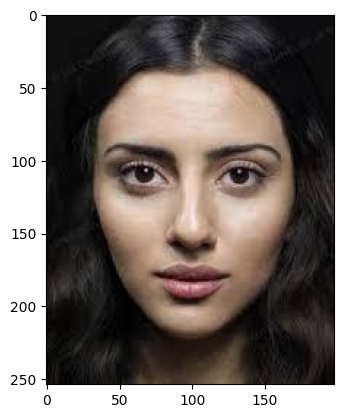

In [51]:
plt.imshow(image[:,:,::-1])

In [52]:
mp_face_mesh = mediapipe.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [53]:
results = face_mesh.process(image[:,:,::-1])

E:\python\FaceDetection_SaveTheFace\venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [54]:
landmarks = results.multi_face_landmarks[0]

In [55]:
landmarks

landmark {
  x: 0.500322461
  y: 0.695306838
  z: -0.0636511371
}
landmark {
  x: 0.500651836
  y: 0.622198164
  z: -0.161441565
}
landmark {
  x: 0.500791788
  y: 0.641364396
  z: -0.0727511495
}
landmark {
  x: 0.473058403
  y: 0.532933056
  z: -0.137630641
}
landmark {
  x: 0.500064492
  y: 0.596853673
  z: -0.177030027
}
landmark {
  x: 0.499440908
  y: 0.560655653
  z: -0.171665341
}
landmark {
  x: 0.498497784
  y: 0.469377279
  z: -0.109653905
}
landmark {
  x: 0.275475174
  y: 0.443780899
  z: 0.0173349362
}
landmark {
  x: 0.496900827
  y: 0.402881384
  z: -0.104858547
}
landmark {
  x: 0.496307343
  y: 0.367761582
  z: -0.122281238
}
landmark {
  x: 0.495371312
  y: 0.228883535
  z: -0.123248972
}
landmark {
  x: 0.500308454
  y: 0.707203746
  z: -0.0575042032
}
landmark {
  x: 0.500624716
  y: 0.715082049
  z: -0.0450655743
}
landmark {
  x: 0.500946283
  y: 0.717040181
  z: -0.0296139624
}
landmark {
  x: 0.501339555
  y: 0.723811805
  z: -0.0253915135
}
landmark {
  x: 0.5

In [56]:
face_oval = mp_face_mesh.FACEMESH_FACE_OVAL

In [57]:
df = pd.DataFrame(list(face_oval), columns= ['p1', 'p2'])

In [58]:
df.head()

,p1,p2
0,176,149
1,297,332
2,150,136
3,109,10
4,356,454


In [59]:
df.shape

(36, 2)

In [60]:
routes_index = []

p1 = df.iloc[0]['p1']
p2 = df.iloc[0]['p2']

for i in range(0, df.shape[0]):
    obj = df[df['p1'] == p2]
    p1 = obj['p1'].values[0]
    p2 = obj['p2'].values[0]
    
    curr_route = []
    curr_route.append(p1)
    curr_route.append(p2)
    routes_index.append(curr_route)

In [61]:
for route_index in routes_index:
    print(f'draw a line from {routes_index[0]} landmark point to {routes_index[1]} landmark point')

draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmark point
draw a line from [149, 150] landmark point to [150, 136] landmar

In [62]:
routes = []
for src_index, target_index in routes_index:
    source = landmarks.landmark[src_index]
    target = landmarks.landmark[target_index]
    
    relative_source = int(source.x * image.shape[1]), int(source.y * image.shape[0])
    relative_target = int(target.x * image.shape[1]), int(target.y * image.shape[0])
    
    routes.append(relative_source)
    routes.append(relative_target)

In [63]:
routes[0:5]

[(71, 208), (64, 202), (64, 202), (55, 193), (55, 193)]

In [64]:
mask = np.zeros((image.shape[0], image.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
mask = mask.astype(bool)

out = np.zeros_like(image)
out[mask] = image[mask]

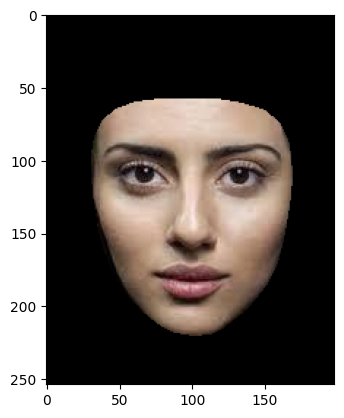

In [65]:
plt.imshow(out[:,:,::-1])